---
layout: page
title: Confian√ßa, Tend√™ncia Central e Dispers√£o
nav_order: 16
---
[<img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/fcd/blob/master/_lessons/16-Confianca.ipynb)

# T√≥pico 16 ‚Äì Confian√ßa, Tend√™ncia Central e Dispers√£o
{: .no_toc .mb-2 }

Ap√≥s aprender a quantificar a incerteza de uma estimativa atrav√©s dos intervalos de confian√ßa constru√≠dos via bootstrap, √© hora de nos aprofundarmos na interpreta√ß√£o desses intervalos, e formalizar algumas no√ß√µes da "centralidade" e da "variabilidade" dos valores de uma distribui√ß√£o. Ao longo dessa aula, introduziremos tamb√©m outras maneiras de quantificar a incerteza e a probabilidade de um conjunto de valores de uma distribui√ß√£o atrav√©s de uma constru√ß√£o matem√°tica, baseada na teoria de Probabilidade.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Aprender a interpretar intervalos de confian√ßa.
1. Aprender a identificar as situa√ß√µes onde espera-se que o bootstrap d√™ bons resultados (ou n√£o).
1. Introduzir e definir medidas de tend√™ncia central e de dispers√£o.
1. Introduzir e aprender como utilizar a Desigualdade de Chebyshev para quantificar a probabilidade de que os valores de uma distribui√ß√£o estejam perto (ou longe) de sua m√©dia. 

{: .no_toc .text-delta }
Material Adaptado do [DSC10 (UCSD)](https://dsc10.com/)

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Animations
from IPython.display import display, IFrame, Video

def show_confidence_interval_slides():
    src="https://docs.google.com/presentation/d/e/2PACX-1vTaPZsueXI6fey_5cj2Y1TevkR1joBvpwaWVsZNvgBlnJSrw1EiBLHJywkFH_QNLU5Tdr6JZgDrhFxG/embed?start=false&loop=false&delayms=3000&rm=minimal"
    width = 940
    height = 940
    display(IFrame(src, width, height))

## Interpretando intervalos de confian√ßa

### Recapitulando: Sal√°rios dos funcion√°rios p√∫blicos da cidade de San Diego

Vamos rodar nosso c√≥digo da aula passada novamente para calcular um intervalo de 95% de confian√ßa para o sal√°rio mediano de todos os funcion√°rios da cidade de San Diego, tomando como base uma amostra de 500 indiv√≠duos.

**Passo 1**: Coletar uma √∫nica amostra de 500 indiv√≠duos da popula√ß√£o.

In [2]:
population = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/15-Bootstrapping/data/2022_salaries.csv').get(['TotalWages'])
population_median = population.get('TotalWages').median()
population_median # Can't see this in real life!

78136.0

In [3]:
np.random.seed(38) # Magic to ensure that we get the same results every time this code is run.
my_sample = population.sample(500)
sample_median = my_sample.get('TotalWages').median()
sample_median

76237.0

**Passo 2**: Bootstrap! Reamostrar um n√∫mero grande de vezes da nossa amostra e, para cada reamostragem, calcular a mediana correspondente. Teremos assim uma distribui√ß√£o emp√≠rica da mediana amostral.

In [4]:
np.random.seed(38) # Magic to ensure that we get the same results every time this code is run.

# Bootstrap the sample to get more sample medians.
n_resamples = 5000
boot_medians = np.array([])

for i in np.arange(n_resamples):
    resample = my_sample.sample(500, replace=True)
    median = resample.get('TotalWages').median()
    boot_medians = np.append(boot_medians, median)
    
boot_medians

array([76896. , 72945. , 73555. , ..., 74431. , 75868. , 78601.5])

**Passo 3**: Tomar os percentis correspondentes √† uma frequ√™ncia total de aproximadamente 95% da distribui√ß√£o emp√≠rica das medianas amostrais (i.e. `boot_medians`). Esse ser√° nosso intervalo de 95% de confian√ßa.

In [5]:
left = np.percentile(boot_medians, 2.5)
right = np.percentile(boot_medians, 97.5)

# Therefore, our interval is:
[left, right]

[68469.0, 81253.5]

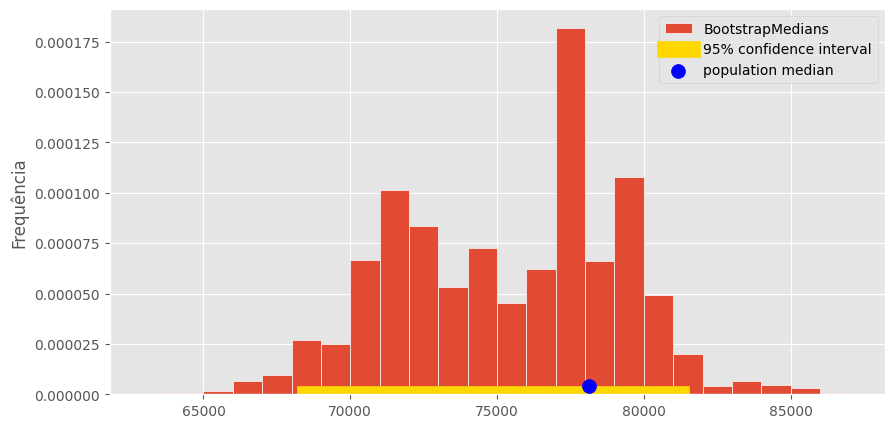

In [6]:
pd.DataFrame().assign(BootstrapMedians=boot_medians).plot(kind='hist', density=True, bins=np.arange(63000, 88000, 1000), ec='w', figsize=(10, 5))
plt.plot([left, right], [0, 0], color='gold', linewidth=12, label='95% confidence interval');
plt.scatter(population_median, 0.000004, color='blue', s=100, label='population median').set_zorder(3)
plt.legend()
plt.ylabel("Frequ√™ncia");

### Intervalos de confian√ßa s√£o estimativas _intervalares_ para um par√¢metro

Aprendemos na aula passada que, com base nos intervalos de confian√ßa (IC), ao inv√©s de simplesmente afirmar

> "podemos dizer que a mediana populacional √© _pr√≥xima_ da mediana amostral, \\$76,237",

n√≥s podemos afirmar

> "podemos dizer, _com 95% de confian√ßa_, que mediana populacional est√° entre \\$68,469 e \\$81,253.50".

**Na aula de hoje, vamos responder as seguintes perguntas**: "Mas afinal, o que 95% de confian√ßa significa?" "Sobre o qu√™ estamos confiantes?" "Esse tipo de t√©cnica sempre funciona?"

### Interpretando intervalos de confian√ßa

- Criamos um IC que cont√©m 95% das medianas das nossas amostras bootstrap.
- Esperamos que a mediana populacional tamb√©m esteja contida nesse IC.
- Por√©m, o qu√£o seguros estamos desse fato? **Dizemos que "podemos afirmar isso com 95% de confian√ßa", mas o que isso significa?**

### Capturando o verdadeiro valor do par√¢metro

- Considere o seguinte passo-a-passo:
    1. Coletar uma **amostra nova** da popula√ß√£o.
    1. Bootstrap: reamostrar dessa amostra v√°rias vezes, calculando a estat√≠stica de interesse (por exemplo a mediana) em cada amostra.
    1. Construir um IC95%.

- Um n√≠vel de 95% de confian√ßa ent√£o significa que, **em aproximadamente 95% das vezes em que realizamos esse processo, o intervalo criado conter√° o verdadeiro valor do par√¢metro**.
    - Em outras palavras: se pud√©ssemos repetir nosso experimento aleat√≥rio um n√∫mero muito grande de vezes, 95% dos intervalos de confian√ßa v√£o conter o verdadeiro valor do par√¢metro.

- Dessa forma, a confian√ßa reside no **processo** que gera o intervalo!

### Intervalos de confian√ßa s√£o como um jogo de argolas!

O ([GIF abaixo](https://twitter.com/EpiEllie/status/1160395672706789376)) cont√©m uma explica√ß√£o intuitiva dos intervalos de confian√ßa.

In [7]:
Video('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/16-Confianca/data/ci-ring-toss.mp4', width=500)

In [8]:
show_confidence_interval_slides()

### M√∫ltiplos intervalos de confian√ßa

- Repetimos o passo-a-passo descrito acima $M = 200$ vezes, obtendo $M = 200$ ICs diferentes.
    - Fizemos isso de antem√£o (demorou um bom tempo) e salvamos os resultados em um arquivo.
- Os ICs obtidos est√£o contidos no array `many_cis` abaixo.

In [9]:
! wget https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/16-Confianca/data/many_cis.npy

--2025-03-30 12:42:38--  https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/16-Confianca/data/many_cis.npy
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 

185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 3328 (3.2K) [application/octet-stream]
Saving to: ‚Äòmany_cis.npy.1‚Äô

many_cis.npy.1      100%[===================>]   3.25K  --.-KB/s    in 0s      

2025-03-30 12:42:38 (79.3 MB/s) - ‚Äòmany_cis.npy.1‚Äô saved [3328/3328]



In [10]:
many_cis = np.load('many_cis.npy')
many_cis

array([[72881.5 , 85383.32],
       [66727.19, 81871.47],
       [65449.32, 82001.4 ],
       ...,
       [64915.5 , 81814.85],
       [66702.5 , 79711.  ],
       [67996.76, 82105.84]])

Na visualiza√ß√£o abaixo:
- A <span style="color:blue">linha azul</span> representa o par√¢metro populacional. **Lembre que o par√¢metro n√£o √© aleat√≥rio.**
- Cada <span style="color:gold">linha dourada</span> representa um IC diferente, obtido utilizado o passo-a-passo descrito anteriormente.
- Note que a _maioria_ dos ICs cont√©m o par√¢metro verdadeiro, mas _n√£o todos_!

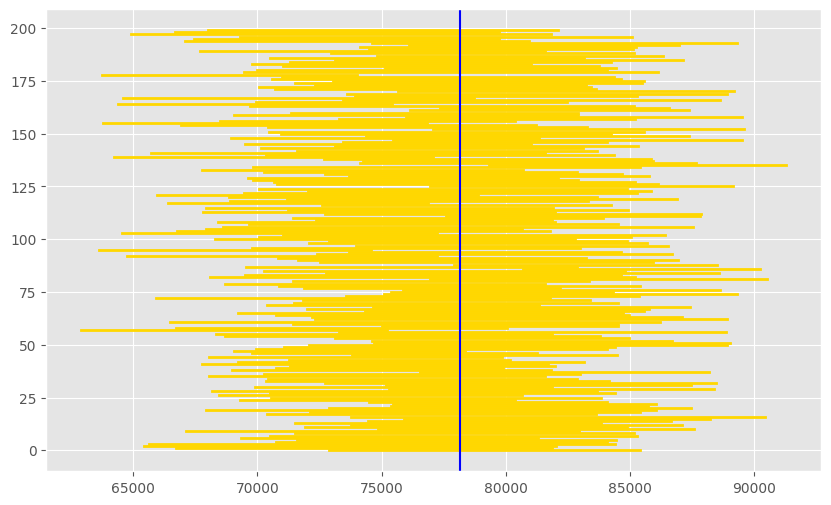

In [11]:
plt.figure(figsize=(10, 6))
for i, ci in enumerate(many_cis):
    plt.plot([ci[0], ci[1]], [i, i], color='gold', linewidth=2)
plt.axvline(x=population_median, color='blue');

### Quais ICs n√£o cont√©m o par√¢metro populacional?

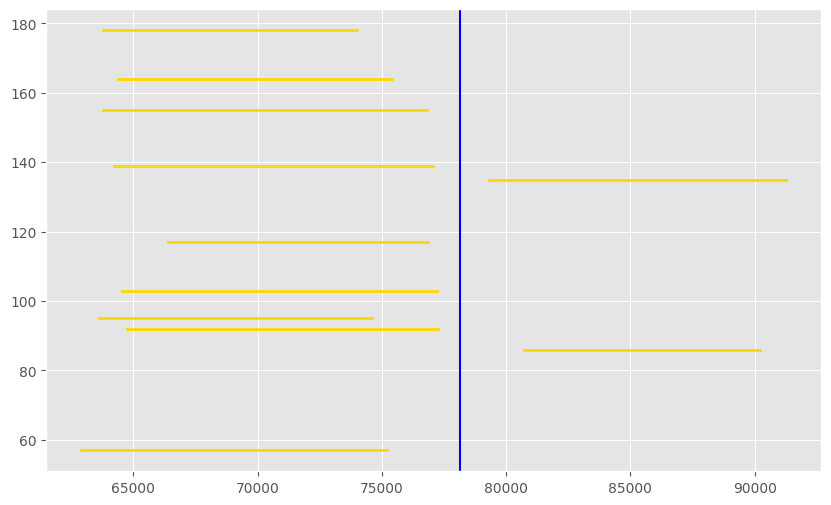

In [12]:
plt.figure(figsize=(10, 6))
count_outside = 0
for i, ci in enumerate(many_cis):
    if ci[0] > population_median or ci[1] < population_median:
        plt.plot([ci[0], ci[1]], [i, i], color='gold', linewidth=2)
        count_outside = count_outside + 1
plt.axvline(x=population_median, color='blue');

In [13]:
count_outside

11

- 11 dos nossos $M = 200$ ICs n√£o cont√©m o verdadeiro valor do par√¢metro.
- Por outro lado, isso significa que 189/200, ou 94.5% dos ICs, cont√©m sim o par√¢metro populacional!
    - N√£o coincidentemente, 94.5% √© bem pr√≥ximo de 95%!

- Na pr√°tica, como coletamos apenas **uma √∫nica amostra**, teremos apenas **um √∫nico IC correspondente**, e n√£o saberemos com certeza se esse IC cont√©m ou n√£o o verdadeiro valor do par√¢metro.
    - Se em um certo sentido nossa amostra n√£o for "boa", isto √©, com uma distribui√ß√£o que seja pr√≥xima da distribui√ß√£o populacional, ent√£o nossa infer√™ncia ser√° prejudicada.

### Escolhendo o n√≠vel de confian√ßa

- Quando coletamos uma amostra "ruim" (isto √©, que n√£o tenha uma distribui√ß√£o pr√≥xima da populacional), ao constru√≠rmos nosso IC √© bem prov√°vel que esse IC n√£o contenha o verdadeiro valor do par√¢metro.
    - Podemos tentar remediar essa situa√ß√£o escolhendo um n√≠vel de confian√ßa mais apropriado, mas note que existe um _tradeoff_ associado √† isso! 

- Se, por exemplo, escolhermos um n√≠vel de confian√ßa igual a 99%: 
    - aproxidamente apenas 1% das vezes nosso IC n√£o conter√° o verdadeiro valor do par√¢metro (o que √© √≥timo!). Por√©m, ...
    - nossos ICs ser√£o muito largos, e logo n√£o muito √∫teis na pr√°tica.

- Se por outro lado escolhermos um n√≠vel de confian√ßa igual a 80%: 
    - muitas das vezes (~20%) o IC n√£o conter√° o verdadeiro valor do par√¢metro (o que n√£o √© t√£o bom assim). Por√©m, ...
    - nossos ICs nesse caso ser√£o bem mais curtos, e logo mais precisos.

- O _tradeoff_ principal nesse contexto √© ent√£o entre **confian√ßa e precis√£o**.
    - Quanto **mais confiante** eu estou de que uma afirmativa √© verdadeira, **menos preciso** essa afirmativa ser√°, e vice-versa.
    - Por exemplo, se eu afirmo que hoje vai come√ßar a chover _exatamente_ √†s 13:14 (uma afirmativa bem precisa), em geral eu quase sempre estarei errado sobre isso (e, logo, pouco confiante).
    - Por outro lado, se eu afirmo que vai chover _algum dia_ desse ano (uma afirmativa muito precisa), em geral eu quase sempre estarei correto sobre isso (e, logo, muito confiante).   

- Para um dado n√≠vel de confian√ßa fixo, como ent√£o podemos fazer com que nosso IC seja mais curto (i.e. mais preciso)?
    - Coletando uma amostra maior!
    - Veremos adiante mais detalhes sobre a rela√ß√£o entre o tamanho amostral, o n√≠vel de confian√ßa e a largura do IC. 

### Como _n√£o_ interpretar intervalos de confian√ßa

Fato: intervalos de confian√ßa podem ser complicados de interpretar corretamente.

In [14]:
# Our interval:
print('Nosso IC95% √© dado por:')
[left, right]

Nosso IC95% √© dado por:


[68469.0, 81253.5]

**O intervalo acima cont√©m 95% de todos os sal√°rios da popula√ß√£o? N√£o!** ‚ùå

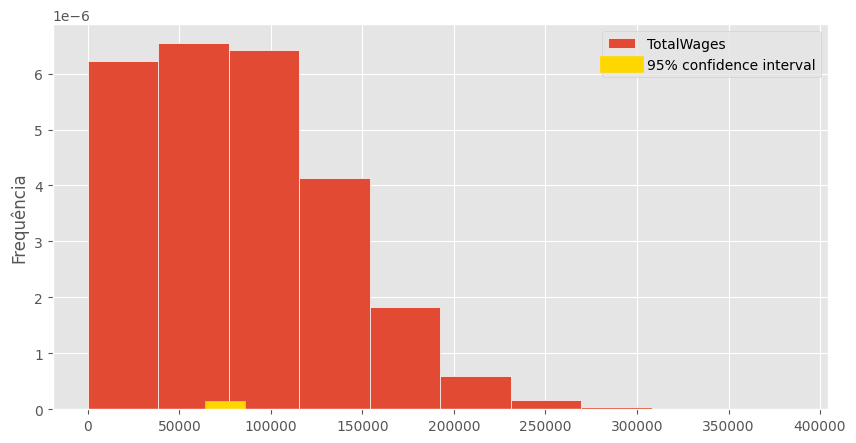

In [15]:
population.plot(kind='hist', y='TotalWages', density=True, ec='w', figsize=(10, 5))
plt.plot([left, right], [0, 0], color='gold', linewidth=12, label='95% confidence interval');
plt.legend()
plt.ylabel("Frequ√™ncia");

Por outro lado, o IC95% _cont√©m sim_ 95% de todos os sal√°rios medianos obtidos pelo bootstrap.

> Em outras palavras, o IC95% cont√©m 95% de todos os valores da _distribui√ß√£o bootstrap_ (mas n√£o da popula√ß√£o).

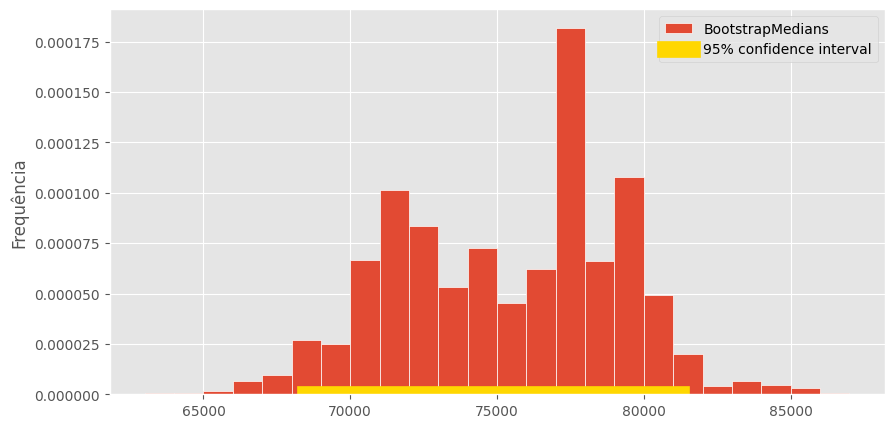

In [16]:
pd.DataFrame().assign(BootstrapMedians=boot_medians).plot(kind='hist', density=True, bins=np.arange(63000, 88000, 1000), ec='w', figsize=(10, 5))
plt.plot([left, right], [0, 0], color='gold', linewidth=12, label='95% confidence interval');
plt.legend()
plt.ylabel("Frequ√™ncia");

In [17]:
# Our interval:
print('Nosso IC95%:')
[left, right]

Nosso IC95%:


[68469.0, 81253.5]

**Ent√£o com 95% de probabilidade esse intervalo cont√©m o par√¢metro populacional? Tamb√©m n√£o!** ‚ùå

E porque n√£o?
- O par√¢metro populacional √© fixo, i.e. **n√£o-aleat√≥rio**(embora desconhecido).
    - O intervalo obtido tamb√©m √© n√£o-aleat√≥rio (embora o processo que o produza seja).
    - Para um dado intervalo, ou o par√¢metro populacional est√° no intervalo ou n√£o est√°. Logo, tamb√©m n√£o h√° aleatoriedade quanto a esse ponto.
- Lembre que o n√≠vel de confian√ßa (nesse caso 95%) est√° relacionado ao qu√£o preciso estamos sendo ao construirmos o intervalo.
    - Dessa forma, todo o processo de criar o IC (amostragem, bootstrapping e finalmente produzir o intervalo) produz um IC que cont√©m o verdadeiro valor do par√¢metro em aproximadamente 95% dos casos.

## "Armadilhas" do bootstrap

### Regras de bolso

- Bootstrap √© uma t√©cnica bem poderosa! N√≥s apenas precisamos coletar uma √∫nica amostra para obter uma distribui√ß√£o aproximada para a mediana amostral.

- Por√©m, essa t√©cnica tem suas limita√ß√µes:
    - O bootstrap n√£o √© muito bom para estat√≠sticas mais "sens√≠veis" a valores extremos (como por exemplo o m√°ximo, ou o m√≠nimo).
         - Essa t√©cnica funciona melhor para estat√≠sticas que s√£o mais "robustas" (a _outliers_).
    - O boostrap fornece bons resultados apenas se a amostra √© "suficientemente pr√≥xima" da popula√ß√£o.
        - Se nossa amostra original **n√£o for representativa da popula√ß√£o**, as amostras bootstrap tamb√©m n√£o ser√£o representativas da popula√ß√£o.

### Exemplo: Estimando o m√°ximo de uma quantidade populacional

- Suponha que, ao inv√©s da mediana, estejamos agora interessados no _m√°ximo_ dos sal√°rios de todos os funcion√°rios p√∫blicos da cidade de San Diego (nossa popula√ß√£o).
- Nossa amostra coletada continua a mesma que t√≠nhamos anteriormente, `my_sample`.
- Nossa estimativa ser√° igual ao m√°ximo dos sal√°rios amostrais (i.e. o maior sal√°rio contido na amostra). Esse m√°ximo √© uma estat√≠stica.

- Para obter uma distribui√ß√£o emp√≠rica do m√°ximo, fazemos ent√£o o seguinte bootstrap:

In [18]:
n_resamples = 5000
boot_maxes = np.array([])

for i in range(n_resamples):
    resample = my_sample.sample(500, replace=True)
    boot_max = resample.get('TotalWages').max()
    boot_maxes = np.append(boot_maxes, boot_max)

In [19]:
boot_maxes

array([339416., 347755., 347755., ..., 257627., 339416., 339416.])

### Visualizando os resultados

Como aqui temos acesso √† popula√ß√£o, podemos encontrar o m√°ximo populacional direto (sem bootstrap), apenas para compara√ß√£o.

In [20]:
population_max = population.get('TotalWages').max()
population_max

384909

Ent√£o, ser√° que o m√°ximo populacional se encontra na parte com "mais massa" da distribui√ß√£o bootstrap?

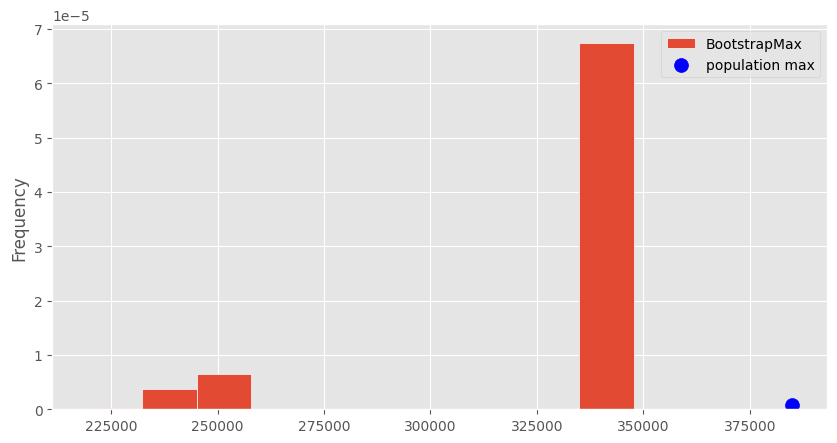

In [21]:
pd.DataFrame().assign(BootstrapMax=boot_maxes).plot(kind='hist', 
                                                     density=True, 
                                                     bins=10,
                                                     ec='w',
                                                     figsize=(10, 5))
plt.scatter(population_max, 0.0000008, color='blue', s=100, label='population max')
plt.legend();

Na verdade n√£o! A distribui√ß√£o bootstrap (e os ICs que podemos construir atrav√©s dela) n√£o captura muito bem o m√°ximo populacional, representado no histograma acima pelo <span style="color:blue"><b>ponto azul</b></span> igual a \$384,909.

> E porque n√£o?! ü§î

In [22]:
my_sample.get('TotalWages').max()

347755

- O maior valor na nossa amostra original √© de \\$347,755. Logo, o maior valor na nossa amostra bootstrap ser√° no m√°ximo igual a \\$347,755.

- Em geral, o bootstrap funciona melhor para medidas de tend√™ncia central ou dispers√£o (como a m√©dia, mediana, desvio padr√£o, etc.) do que para medidas que s√£o mais sens√≠veis a outliers, como os extremos (m√°ximo e m√≠nimo).

## Medidas de tend√™ncia central e dispers√£o

### Reflex√µes e questionamentos

- Se soubermos a m√©dia e o desvio padr√£o de uma distribui√ß√£o (mas nada mais que isso), o que podemos dizer sobre a forma dessa distribui√ß√£o?

- O que √© a distribui√ß√£o Normal, e qual a rela√ß√£o dessa distribui√ß√£o com algumas das outras distribui√ß√µes que j√° vimos at√© agora?

- Vamos tentar responder essas perguntas ao longo dessa e das pr√≥ximas aulas.

- Come√ßaremos com algumas maneiras de medirmos a tend√™ncia central e dispers√£o de uma distribui√ß√£o.

### Tend√™ncia central

- Uma medida de **tend√™ncia central** descreve _onde_ (ou seja, ao redor de qual valor) uma distribui√ß√£o est√° centralizada.
    - A tend√™ncia central de uma distribui√ß√£o √© algumas vezes tamb√©m denominada de _par√¢metro de loca√ß√£o_ dessa distribui√ß√£o.
    - A intui√ß√£o por tr√°s dessa nomenclatura vem do fato de que as distribui√ß√µes em geral t√™m padr√µes de variabilidade _em torno_ das medidas de tend√™ncia central, o que √© equivalente a dizer que uma distribui√ß√£o est√° _localizada_ em torno do seu centro.

- At√© agora, j√° vimos duas medidas de tend√™ncia central: a **m√©dia** e a **mediana**.

### Teste r√°pido ‚úÖ

Considere os seguintes histogramas, correspondentes a duas distribui√ß√µes diferentes:

<center>
    <table><tr>
        <td> <center><img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/16-Confianca/data/hist.jpg" width=70%></center>  </td>
        <td> <center><img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/16-Confianca/data/hist2.jpg" width=70%></center> </td>
    </tr></table>
</center>

As m√©dias dessas distribui√ß√µes s√£o iguais ou diferentes? E suas medianas?

- A. Ambas s√£o iguais.
- B. As m√©dias s√£o diferentes, mas as medianas s√£o iguais.
- C. As m√©dias s√£o iguais, mas as medianas s√£o diferentes.
- D. Ambas s√£o diferentes.

### Exemplo: Atrasos de v√¥os ‚úàÔ∏è

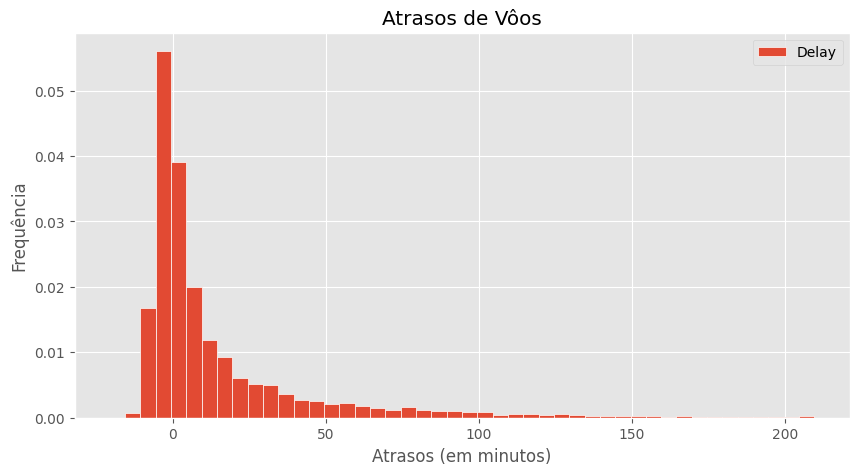

In [23]:
delays = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/16-Confianca/data/united_summer2015.csv')
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', figsize=(10, 5))
plt.title('Atrasos de V√¥os')
plt.xlabel('Atrasos (em minutos)')
plt.ylabel("Frequ√™ncia");

**Pergunta**: Qual √© maior nesta distribui√ß√£o ‚Äì a m√©dia ou a mediana?

In [24]:
delays.get('Delay').mean()

16.658155515370705

In [25]:
delays.get('Delay').median()

2.0

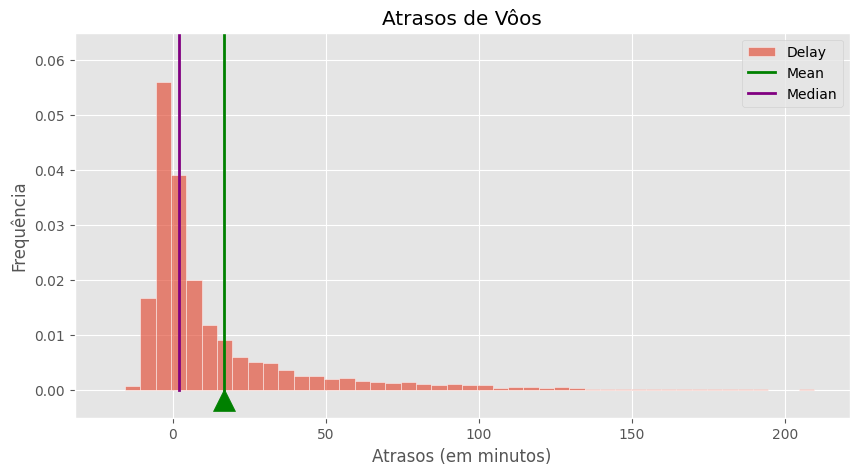

In [26]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', alpha=0.65, figsize=(10, 5))
plt.plot([delays.get('Delay').mean(), delays.get('Delay').mean()], [0, 1], color='green', label='Mean', linewidth=2)
plt.scatter([delays.get('Delay').mean()], [-0.0017], color='green', marker='^', s=250)
plt.plot([delays.get('Delay').median(), delays.get('Delay').median()], [0, 1], color='purple', label='Median', linewidth=2)
plt.title('Atrasos de V√¥os')
plt.xlabel('Atrasos (em minutos)')
plt.ylim(-0.005, 0.065)
plt.legend()
plt.ylabel("Frequ√™ncia");

## M√©dia

- **Defini√ß√£o**: Soma de todos os elementos da amostra, divido pelo tamanho amostral $n$.
    - √â comum denotarmos a m√©dia _populacional_ por $\mu$ e a m√©dia _amostral_ por $\bar{X}$.
    - Denotando nosso conjunto de observa√ß√µes por $\mathbf{X} := (X_1, \ldots, X_n)$, definimos ent√£o $\bar{X} := \sum^n_{i=1} X_i$.  

- Visualmente, a m√©dia amostral pode ser pensada como o "ponto de equil√≠brio" do histograma acima.
    - A soma das diferen√ßas entre cada ponto e a m√©dia √© sempre igual a 0.
    - Uma analogia √© pensar na m√©dia amostral como o ponto de apoio de uma gangorra.

## Mediana

- **Defini√ß√£o**: Ponto que divide a amostra ao meio.
    - Metade da √°rea do histograma est√° √† direita da mediana, e a outra metade √† esquerda.
    - Usualmente denotamos a mediana populacional por $m(\mathbf{X})$, e a mediana amostral por $\hat{m}(\mathbf{X})$.

- A mediana √© o percentil 50 de uma distribui√ß√£o de probabilidades.

- Se uma distribui√ß√£o √© **sim√©trica** em torno de um valor, ent√£o esse valor coincide com ambas m√©dia e mediana.

- Se uma distribui√ß√£o √© **assim√©trica** (_√† direita_ ou _√† esquerda_), ent√£o a m√©dia ser√° diferente da mediana (respectivamente, √† direita ou √† esquerda, de acordo com a dire√ß√£o da assimetria).

- **Propriedade importante**: A mediana √© mais **robusta** (menos **sens√≠vel**) a **_outliers_/valores extremos**.

## Desvio Padr√£o

### Como caracterizar a "largura" de uma distribui√ß√£o? 

- Uma ideia natural seria tomarmos o maior valor e subtrair pelo menor valor encontrado na distribui√ß√£o.
    - Essa medida √© conhecida como a **amplitude** (_range_, em ingl√™s) da distribui√ß√£o.
    - Apesar de intuitiva, a amplitude n√£o nos diz muito sobre a _forma_ da distribui√ß√£o.
        - Al√©m disso, a amplitude (populacional) de muitas distribui√ß√µes que utilizaremos na pr√°tica √© infinita, ou n√£o √© bem definida (por exemplo se nossa vari√°vel aleat√≥ria toma valores no conjunto dos n√∫meros reais).

- Uma outra possibilidade seria utilizarmos o _desvio padr√£o_ da distribui√ß√£o.
    - O desvio padr√£o √© uma medida do quanto, _em m√©dia_, as observa√ß√µes _est√£o distantes da m√©dia_.

### Desvios em torno da m√©dia

- Para medir o qu√£o distante cada observa√ß√£o est√° da m√©dia, simplesmente tomamos a diferen√ßa entre aquela observa√ß√£o e a m√©dia.
    -   Essa quantidade √© conhecida como _desvio em torno da m√©dia_.
    -   Formalmente, se $X_i$ √© a $i$-√©sima observa√ß√£o da nossa amostra $\mathbf{X}$, definimos o _desvio de $X_i$ em torno da m√©dia amostral $\bar{X}$_ por $X_i - \bar{X}$, para $i = 1, \ldots, n$.

Considere ent√£o o seguinte exemplo:

In [27]:
data = np.array([2, 3, 3, 9])
np.mean(data)

4.25

In [28]:
deviations = data - np.mean(data)
deviations

array([-2.25, -1.25, -1.25,  4.75])

Cada entrada em `deviations` mede o desvio do elemento correspondente em `data` em torno da m√©dia (4.25).

E qual √© o desvio m√©dio, nesse caso?

In [29]:
np.mean(deviations)

0.0

- **Fato**: a m√©dia dos desvios em torno da m√©dia √© _sempre igual a 0_, independente da distribui√ß√£o ser amostral ou populacional.
    - Uma consequ√™ncia disso √© que o desvio m√©dio em torno da m√©dia acaba n√£o sendo ent√£o uma medida √∫til da dispers√£o de uma distribui√ß√£o.

### Desvios em torno da m√©dia, **ao quadrado**

Vamos agora tomar o quadrado dos desvios em torno da m√©dia:

In [30]:
# Square all the deviations:
deviations ** 2

array([ 5.06,  1.56,  1.56, 22.56])

e ent√£o tomar a m√©dia dos desvios ao quadrado:

In [31]:
variance = np.mean(deviations ** 2)
variance

7.6875

A quantidade calculada acima, isto √©, a _m√©dia dos desvios quadrados em torno da m√©dia_, √© conhecido como **vari√¢ncia**.

### Raiz quadrada da soma dos quadrados?

- Apesar da vari√¢ncia ser uma medida muito √∫til de dispers√£o, em geral ela possui um problema de interpreta√ß√£o: a _unidade_ na qual a vari√¢ncia √© expressa n√£o √© igual √† de cada $X_i$, mas sim de $X_i^2$!   
- Por exemplo, se nossos dados est√£o em $\text{USD}$ ou $\text{BRL}$ (d√≥lares ou reais), a vari√¢ncia estar√° expressa em $\text{USD}^2$ ou $\text{BRL}^2$.
- Para contornar esse problema de interpretabilidade, tomamos ent√£o a _raiz quadrada_ da vari√¢ncia, e o resultado √© conhecido como **desvio padr√£o**.

In [32]:
# Standard deviation (SD) is the square root of the variance.
sd = variance ** 0.5
sd

2.7726341266023544

### Desvio padr√£o

- **Defini√ß√£o**: Raiz da m√©dia dos desvios (em torno da m√©dia) ao quadrado.
    - Usualmente denotamos a vari√¢ncia populacional por $\sigma^2$, o desvio padr√£o (DP) populacional por $\sigma$, e os an√°logos amostrais por $S$ e $S^2$, respectivamente.

Formalmente,

$$\begin{align*}
    S^2 &:= \frac{\sum^n_{i=1} (X_i - \bar{X})^2}{n}, & S &= \sqrt{S^2} = \sqrt{\frac{\sum^n_{i=1} (X_i - \bar{X})^2}{n}}.
\end{align*}$$

- O DP (que tamb√©m √© representado pela sigla em ingl√™s, SD, de _standard deviation_) mede o _qu√£o distantes_ os valores em uma distribui√ß√£o est√£o de sua m√©dia.
    - Equivalentemente, o DP mede o qu√£o _dispersos_ s√£o os valores de uma distribui√ß√£o (em torno de sua m√©dia).  
    - Dessa forma, quanto maior o DP, mais dispersos ser√£o os dados.

- Lembre que, crucialmente, o desvio padr√£o √© expresso nas mesmas unidades de $\mathbf{X}$.

- A biblioteca `numpy` tem uma fun√ß√£o, `np.std`, que calcula o desvio padr√£o de um conjunto de dados.

In [33]:
# Note that this evaluates to the same number we found on the previous cell.
np.std(data)

2.7726341266023544

### E como podemos utilizar o desvio padr√£o na pr√°tica?

Na pr√°tica, a grande maioria dos valores de uma distribui√ß√£o est√£o "a alguns DPs da m√©dia", isto √©, no intervalo $\bar{X} \pm k \cdot \sigma$, onde $k \in \mathbb{N}$.

Vamos agora formalizar um pouco essa intui√ß√£o.

### Desigualdade de Chebyshev

**Fato**: Para **"qualquer"** distribui√ß√£o de probabilidade, a probabilidade dos valores estarem entre "m√©dia ¬± $k$ DPs" (ou a $k$ DPs da m√©dia) √© sempre maior ou igual a

$$1 - \frac{1}{k^2}
$$

Esse fato decorre da **Desigualdade de Chebyshev**, uma ferramenta bem importante no estudo de Probabilidade.

A tabela a seguir cont√©m as probabilidades correspondentes para alguns valores de $k$:

| $k$ | Intervalo | Probabilidade |
| ----- | ----- | ----- |
|$k = 1$| $\bar{X} \pm 1 \cdot \sigma$| $\geq 1 - \frac{1}{1} =  0%$|
|$k = 2$| $\bar{X} \pm 2 \cdot \sigma$| $\geq 1 - \frac{1}{4} = 75%$|
|$k = 3$| $\bar{X} \pm 3 \cdot \sigma$| $\geq 1 - \frac{1}{9} \simeq 88.88%$|
|$k = 4$| $\bar{X} \pm 4 \cdot \sigma$| $\geq 1 - \frac{1}{16} = 93.75%$|
|$k = 5$| $\bar{X} \pm 5 \cdot \sigma$| $\geq 1 - \frac{1}{25} = 96%$|

### Atrasos de v√¥os (mais uma vez)

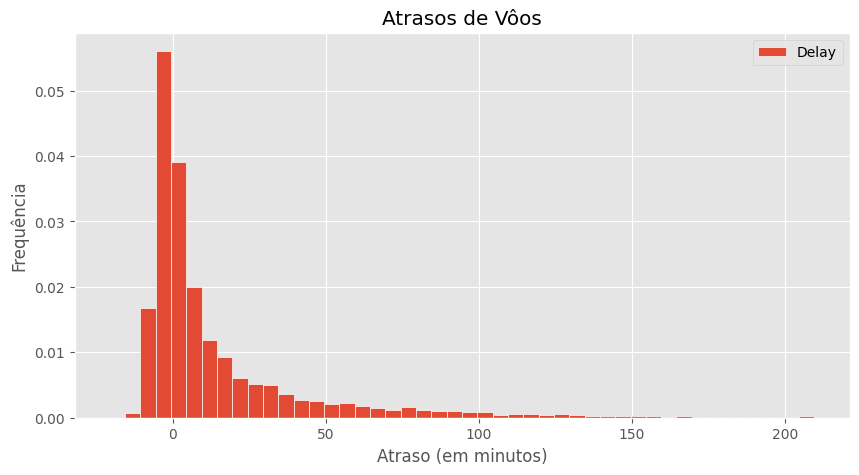

In [34]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, ec='w', figsize=(10, 5), title='Atrasos de V√¥os')
plt.xlabel('Atraso (em minutos)')
plt.ylabel("Frequ√™ncia");

In [35]:
delay_mean = delays.get('Delay').mean()
delay_mean

16.658155515370705

In [36]:
delay_std = np.std(delays.get('Delay')) # There is no .std() method in babypandas!
delay_std

39.480199851609314

### M√©dia e desvio padr√£o

A Desigualdade de Chebyshev nos diz que

- **Pelo menos** 75% dos atrasos de v√¥os est√£o no seguinte intervalo:

In [37]:
delay_mean - 2 * delay_std, delay_mean + 2 * delay_std

(-62.30224418784792, 95.61855521858934)

- **Pelo menos** 88.88% dos atrasos est√£o no seguinte intervalo:

In [38]:
delay_mean - 3 * delay_std, delay_mean + 3 * delay_std

(-101.78244403945723, 135.09875507019865)

Vamos visualizar esses intervalos:

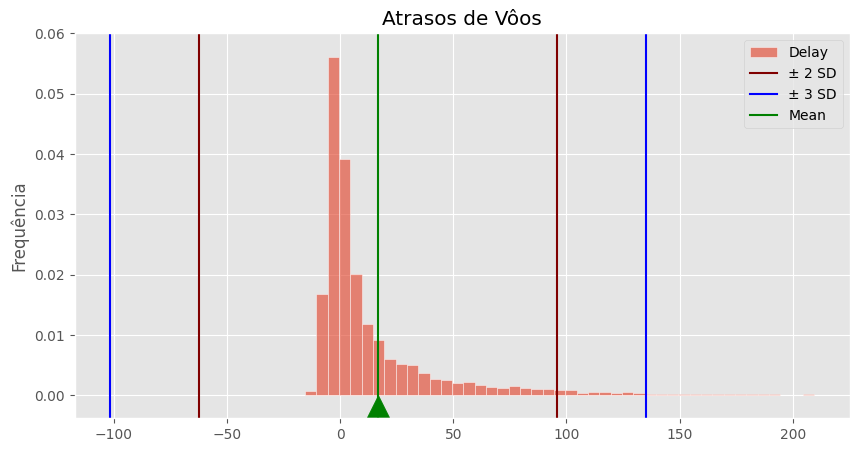

In [39]:
delays.plot(kind='hist', y='Delay', bins=np.arange(-20.5, 210, 5), density=True, alpha=0.65, ec='w', figsize=(10, 5), title='Atrasos de V√¥os')
plt.axvline(delay_mean - 2 * delay_std, color='maroon', label='¬± 2 SD')
plt.axvline(delay_mean + 2 * delay_std, color='maroon')

plt.axvline(delay_mean + 3 * delay_std, color='blue',  label='¬± 3 SD')
plt.axvline(delay_mean - 3 * delay_std, color='blue')

plt.axvline(delay_mean, color='green', label='Mean')
plt.scatter([delay_mean], [-0.0017], color='green', marker='^', s=250)
plt.ylim(-0.0038, 0.06)
plt.legend()
plt.ylabel("Frequ√™ncia");

### A Desigualdade de Chebyshev nos fornece apenas _limites inferiores_!

Lembre que a Desigualdade de Chebyshev nos diz que, **pelo menos** $1 - \frac{1}{k^2}$ dos valores de uma distribui√ß√£o est√£o a at√© $k$ DPs da m√©dia.

No caso dos atrasos de v√¥os, a Desigualdade de Chebyshev nos diz ent√£o que **pelo menos** 75% dos atrasos est√£o dentro do seguinte intervalo:

In [40]:
delay_mean - 2 * delay_std, delay_mean + 2 * delay_std

(-62.30224418784792, 95.61855521858934)

Na verdade, por√©m, a propor√ß√£o de atrasos de v√¥os contida nesse intervalo √© muito maior:

In [41]:
within_2_sds = delays[(delays.get('Delay') >= delay_mean - 2 * delay_std) & 
                      (delays.get('Delay') <= delay_mean + 2 * delay_std)]

within_2_sds.shape[0] / delays.shape[0]

0.9560940325497288

Quando sabemos mais sobre o comportamento (ou a forma) de uma distribui√ß√£o, podemos fazer afirmativas mais precisas que a Desigualdade de Chebyshev em termos da probabilidade dos valores que est√£o a $k$ DPs da m√©dia.

### Desafio

Considere que, para um certo conjunto de dados, a Desigualdade de Chebyshev nos permita dizer que pelo menos $\frac{8}{9}$ das observa√ß√µes est√£o contidas no intervalo entre $-20$ e $40$. Qual √© o desvio padr√£o desse conjunto de dados?


<details><summary>‚úÖ Clique aqui para ver a resposta <b>depois</b> de tentar por conta pr√≥pria.</summary>

- A Desigualdade de Chebyshev nos diz que pelo menos $1 - \frac{1}{k^2}$ dos valores est√£o a $k$ desvios padr√£o da m√©dia.
- Encontramos primeiro o valor de $k$, resolvendo a equa√ß√£o $1 - \frac{1}{k^2} = \frac{8}{9}$, resultando em $k = 3$.
- Dessa forma, o valor de $-20$ est√° a $3$ DPs abaixo da m√©dia, e o valor de $40$ est√° a $3$ DPs acima da m√©dia.
- O ponto m√©dio entre $-20$ e $40$ √© igual a $10$, ent√£o a m√©dia √© igual a $\bar{X} = 10$.
- Como $k = 3$ DPs est√£o entre $10$ and $40$ (ou entre $-20$ e $10$), ent√£o $1$ DP √© igual a $\sigma = \frac{30}{3} = 10$.
</details>

## Resumo e pr√≥xima aula

### Resumo: Bootstrap e intervalos de confian√ßa

- O boostrap nos fornece uma maneira de construir uma distribui√ß√£o emp√≠rica de uma estat√≠stica com base em uma √∫nica amostra. Com a distribui√ß√£o bootstrap, podemos criar intervalos de $\gamma\%$ de confian√ßa tomando como limite inferior e superior percentis que contenham $\gamma\%$ da distribui√ß√£o bootstrap.
- Um IC constru√≠do dessa maneira nos permite quantificar a incerteza sobre a nossa estimativa do par√¢metro populacional.
    - Dessa forma, ao inv√©s de reportar apenas uma estimativa pontual para o par√¢metro de interesse, podemos reportar um conjunto de estimativas.
- **Intervalos de confian√ßa precisam ser interpretados com cuidado.** A "confian√ßa" reside no processo que gera os intervalos, e n√£o em um IC em particular.
- O bootstrap funciona bem para estat√≠sticas que n√£o s√£o t√£o sens√≠veis √† pequenas varia√ß√µes na amostra (tais como a m√©dia e a mediana, mas n√£o para m√°ximos e m√≠nimos).

### Resumo: Tend√™ncia central, dispers√£o e a Desigualdade de Chebyshev

- A m√©dia e a mediana s√£o medidas de tend√™ncia central.
- A vari√¢ncia e o desvio padr√£o (DP) s√£o medidas de dispers√£o.
    - O DP √© igual a raiz quadrada da vari√¢ncia.
    - Em linhas gerais, o desvio padr√£o mede, em m√©dia, o qu√£o distantes da m√©dia os valores de uma distribui√ß√£o est√£o.
- A Desigualdade de Chebyshev diz que, em qualquer distribui√ß√£o, a probabilidade dos valores que est√£o a $k$ DPs da m√©dia √© pelo menos igual a $1 - \frac{1}{k^2}$.
    - Dependendo da distribui√ß√£o, a verdadeira probabilidade dos valores que est√£o a $k$ DPs da m√©dia pode ser _maior_ que $1 - \frac{1}{k^2}$, mas nunca _menor_.

### Pr√≥xima aula

O que √© a distribui√ß√£o "Normal", e qual √© a rela√ß√£o dessa distribui√ß√£o com algumas das distribui√ß√µes que j√° vimos at√© agora?